In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split


In [63]:
red = pd.read_csv("data/winequality-red.csv", sep=';')
white = pd.read_csv("data/winequality-white.csv", sep=';')
white.head()
red['type'] = 1
white['type'] = 0
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [64]:
both = [red,white]
redAndWhite = pd.concat(both)
redAndWhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [65]:
red.describe()
white.describe()
redAndWhite.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


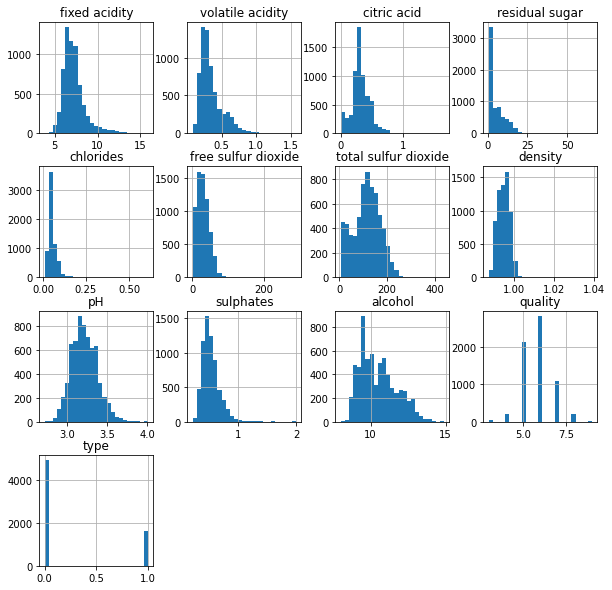

In [66]:
redAndWhite.hist(bins=25,figsize=(10,10))
plt.show()

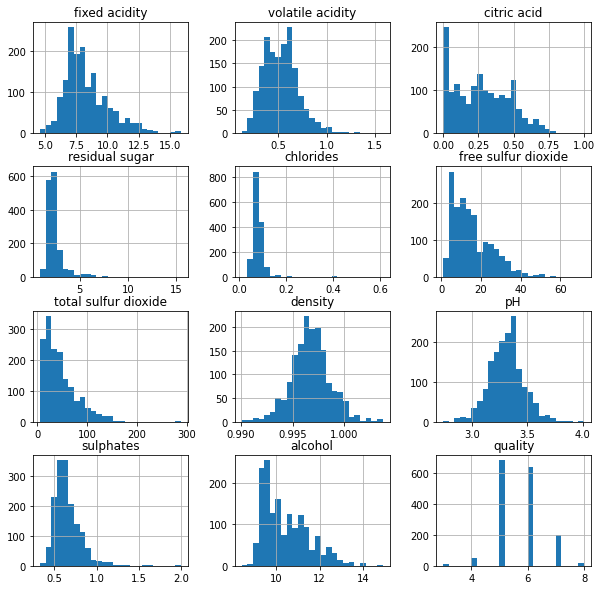

In [6]:
red.hist(bins=25,figsize=(10,10))
plt.show()

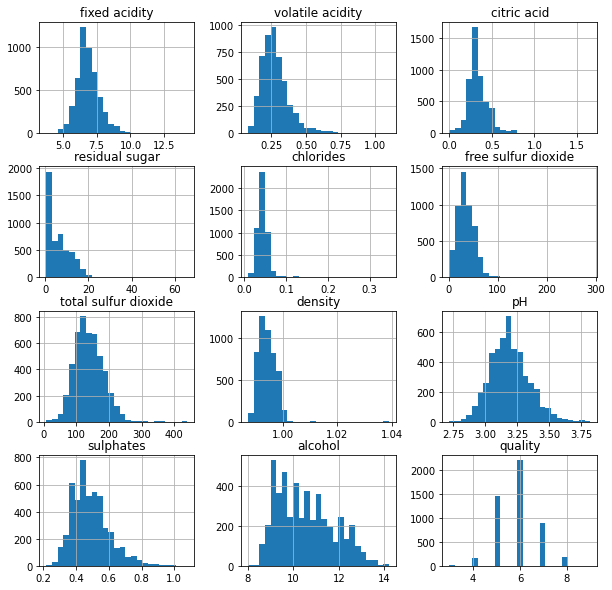

In [7]:
white.hist(bins=25,figsize=(10,10))
plt.show()

In [67]:
features = red.drop(["quality"], axis=1)
targets = red['quality']
wFeatures = white.drop(["quality"], axis=1)
wTargets = white['quality']
rwFeatures = redAndWhite.drop(['quality', 'type'], axis=1)
rwTargets = redAndWhite['quality']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(rwFeatures, rwTargets, test_size=0.1)

In [69]:
#Normalizing data
#
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()
norm_fit = norm.fit(X_train)
new_xtrain = norm_fit.transform(X_train)
new_xtest = norm_fit.transform(X_test)

print(new_xtrain)

[[0.20661157 0.08       0.18072289 ... 0.58139535 0.1011236  0.07246377]
 [0.24793388 0.16666667 0.26506024 ... 0.3255814  0.11235955 0.2173913 ]
 [0.23966942 0.13333333 0.18674699 ... 0.24806202 0.14044944 0.49275362]
 ...
 [0.25619835 0.12666667 0.24698795 ... 0.33333333 0.26404494 0.49275362]
 [0.33884298 0.13333333 0.24698795 ... 0.42635659 0.16292135 0.24637681]
 [0.4214876  0.50666667 0.20481928 ... 0.31007752 0.14606742 0.15942029]]


In [70]:
from sklearn import model_selection
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge

In [71]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(new_xtrain, y_train) 
pred_train_lasso = model_lasso.predict(new_xtrain)
print("MSE:", mean_squared_error(y_train,pred_train_lasso))
print("Test Score:",model_lasso.score(new_xtest, y_test))
print("Training Score:", model_lasso.score(new_xtrain, y_train))

MSE: 0.579182929272449
Test Score: 0.24688106322979742
Training Score: 0.24479240796757196


In [72]:
rr = Ridge(alpha=0.01)
rr.fit(new_xtrain, y_train) 
pred_train_rr= rr.predict(new_xtrain)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))


pred_test_rr= rr.predict(new_xtest)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
rr.score(new_xtest, y_test), rr.score(new_xtrain, y_train)

0.7375696017521235
0.7087798879510565


(0.30265279072194295, 0.29065646825667824)

In [73]:
import numpy as np
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="median")
dummy_regr.fit(new_xtrain, y_train)

pred_train_dummy = dummy_regr.predict(new_xtrain)
print("MSE:", mean_squared_error(y_train,pred_train_dummy))



MSE: 0.801607662048914


[0, 0, 0, 0, 127, 509, 14, 0]


<BarContainer object of 8 artists>

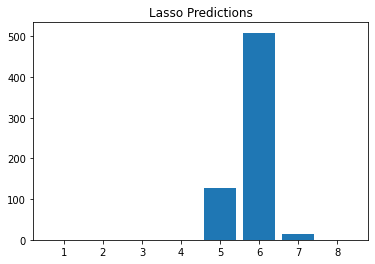

In [74]:
# plt.xlabel('actual')
# plt.ylabel('predicted')
plt.title('Lasso Predictions')
#print(np.rint(model_lasso.predict(new_xtest)))
predicted = np.rint(model_lasso.predict(new_xtest))

counts_arr =[]
for i in range(1,9):
    counts = np.count_nonzero((predicted == i))
    counts_arr.append(counts)
    

print(counts_arr)
plt.bar([1,2,3,4,5,6,7,8], counts_arr)

[0, 0, 1, 22, 192, 309, 104, 22]


<BarContainer object of 8 artists>

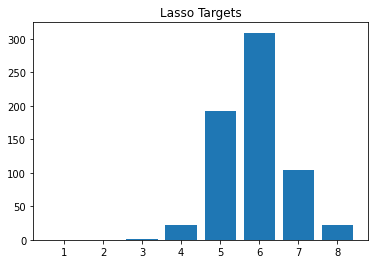

In [75]:
plt.title('Lasso Targets')
#print(np.rint(model_lasso.predict(new_xtest)))
predicted = np.rint(y_test)

counts_arr =[]
for i in range(1,9):
    counts = np.count_nonzero((predicted == i))
    counts_arr.append(counts)
    

print(counts_arr)
plt.bar([1,2,3,4,5,6,7,8], counts_arr)

In [ ]:
#confusion matrix or heat map vs double bar
#cross validate after split to figure out how to normalize/scale best

In [ ]:
#how choose hyperparameters?
#how you didnt leak data from training to test

#tell what you did not how you did it -> do not say you used func in scikit learn 
#->assume reader knows about machine learning

#tell why picked lambda or learning rate

#why using score or mean squared?? -> is it best for this model? can use newspapers for this